# CS5481 - Tutorial 4
## Data Visualization

Welcome to CS5481 tutorial. In this tutorial, you will learn to utilize matplotlib to visualize your data with proper display method.

What

*   (**What**) Data visualization is the process of creating visual representations, like charts and graphs, from raw data to make it easier to understand, identify patterns, and communicate insights.
*   (**Why**) It is important because it enables quick identification of trends and outliers, supports faster and more informed decision-making, and makes complex information accessible to both technical and non-technical audiences.


## preparation
- Python
- Python Libraries
  - matplotlib
  - seaborn
  - pandas
  - numpy

In [ ]:
! pip install matplotlib
! pip install seaborn

## 1. Import Libraries

In [ ]:
import numpy as np

import pandas as pd

import matplotlib as mpl

import matplotlib.pyplot as plt

import seaborn as sns

Set parameters of figures

In [ ]:
large = 22; med = 16; small = 12

params = {'axes.titlesize': large,

          'legend.fontsize': med,

          'figure.figsize': (16, 10),

          'axes.labelsize': med,

          'axes.titlesize': med,

          'xtick.labelsize': med,

          'ytick.labelsize': med,

          'figure.titlesize': large}

plt.rcParams.update(params)

plt.style.use("seaborn-v0_8-whitegrid")

# 2. Situations
We group figures into 5 different situations.
- Correlation
- Deviation
- Ranking
- Distribution
- Composition


## 2. 1 Correlation

### 2.1.1 Scatter plot
A scatter plot is a classic and basic chart for studying the relationship between two variables. If you have multiple groups in your data, you may want to visualize each group in a different color.

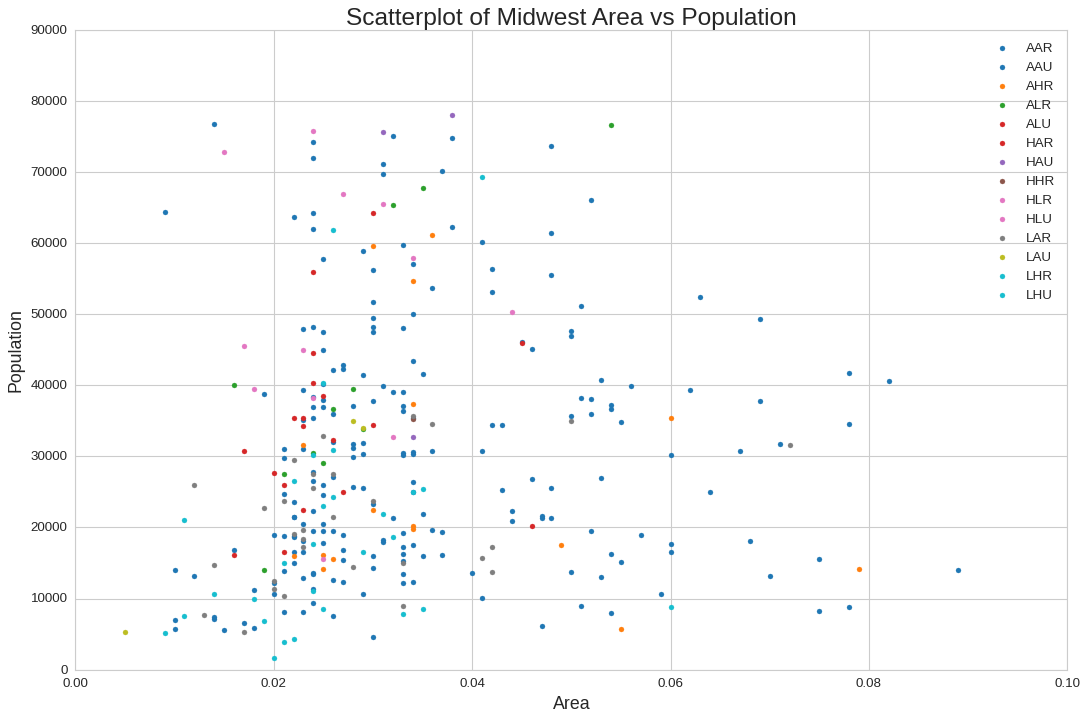

In [ ]:
# Import dataset

midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")

# Prepare Data

# Create as many colors as there are unique midwest['category']

categories = np.unique(midwest['category'])

colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]



# Draw Plot for Each Category

plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')



for i, category in enumerate(categories):

    plt.scatter('area', 'poptotal',

                data=midwest.loc[midwest.category==category, :],

                s=20, color=colors[i], label=str(category))

# Decorations

plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),

              xlabel='Area', ylabel='Population')



plt.xticks(fontsize=12); plt.yticks(fontsize=12)

plt.title("Scatterplot of Midwest Area vs Population", fontsize=22)

plt.legend(fontsize=12)

plt.show()

### 2.1.2 Correlogram

Correlation plots are used to visually see measures of correlation between all possible pairs of numerical variables in a given data frame (or two-dimensional array).

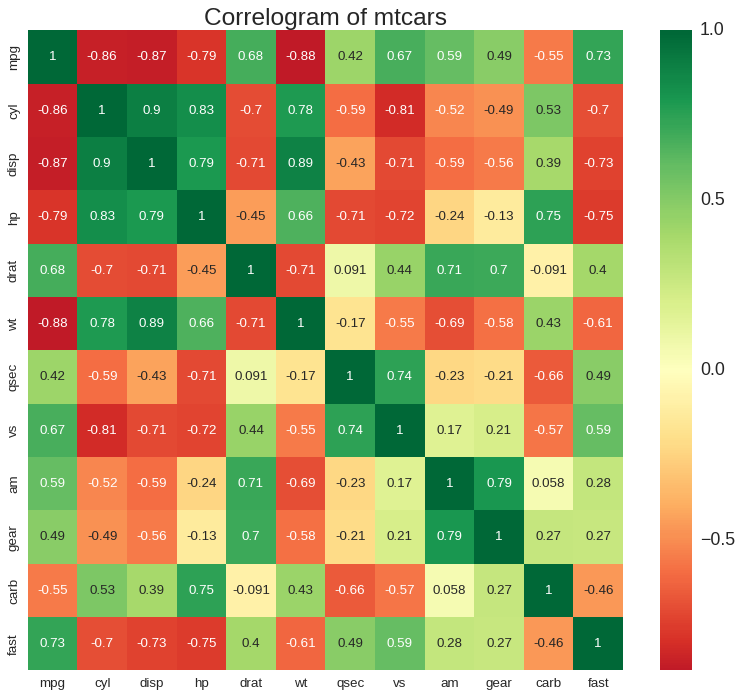

In [ ]:
# Import Dataset

df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
df_numeric = df.select_dtypes(include='number')
## https://github.com/selva86/datasets/blob/master/mtcars.csv

# Plot

plt.figure(figsize=(12,10), dpi=80)
sns.heatmap(df_numeric.corr(),
            xticklabels=df_numeric.columns,
            yticklabels=df_numeric.columns,
            cmap='RdYlGn',
            center=0,
            annot=True)



# Decorations

plt.title('Correlogram of mtcars', fontsize=22)

plt.xticks(fontsize=12)

plt.yticks(fontsize=12)

plt.show()



## 2.2 Deviation

### 2.2.1 Diverging Bars
Diverging Bars are a great tool if you want to see how items are changing based on a single metric, and visualize the order and amount of this difference. It helps to quickly differentiate the performance of groups in the data and is very intuitive and communicates this immediately.

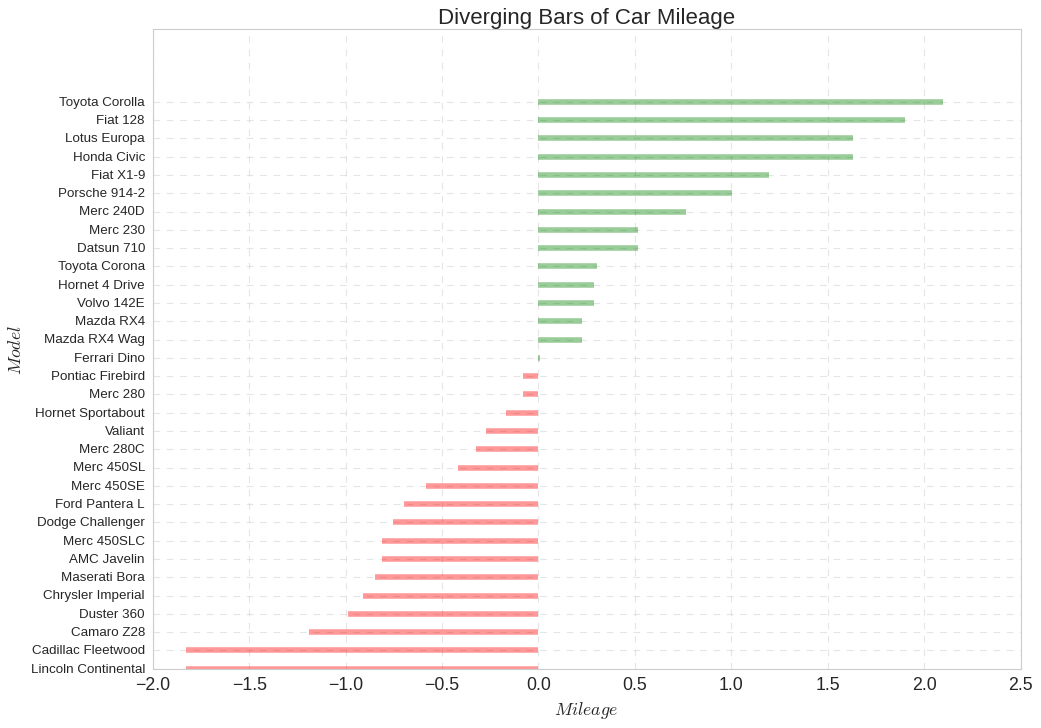

In [ ]:
# Prepare Data

df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")

x = df.loc[:, ['mpg']]

df['mpg_z'] = (x - x.mean())/x.std()

df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]

df.sort_values('mpg_z', inplace=True)

df.reset_index(inplace=True)



# Draw plot

plt.figure(figsize=(14,10), dpi= 80)

plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z, color=df.colors, alpha=0.4, linewidth=5)



# Decorations

plt.gca().set(ylabel='$Model$', xlabel='$Mileage$')

plt.yticks(df.index, df.cars, fontsize=12)

plt.title('Diverging Bars of Car Mileage', fontdict={'size':20})

plt.grid(linestyle='--', alpha=0.5)

plt.show()

### 2.2.2 Diverging Texts
Diverging Texts are similar to Diverging Bars and can be used if you want to display the value of each item in the chart in a nice and presentable way.

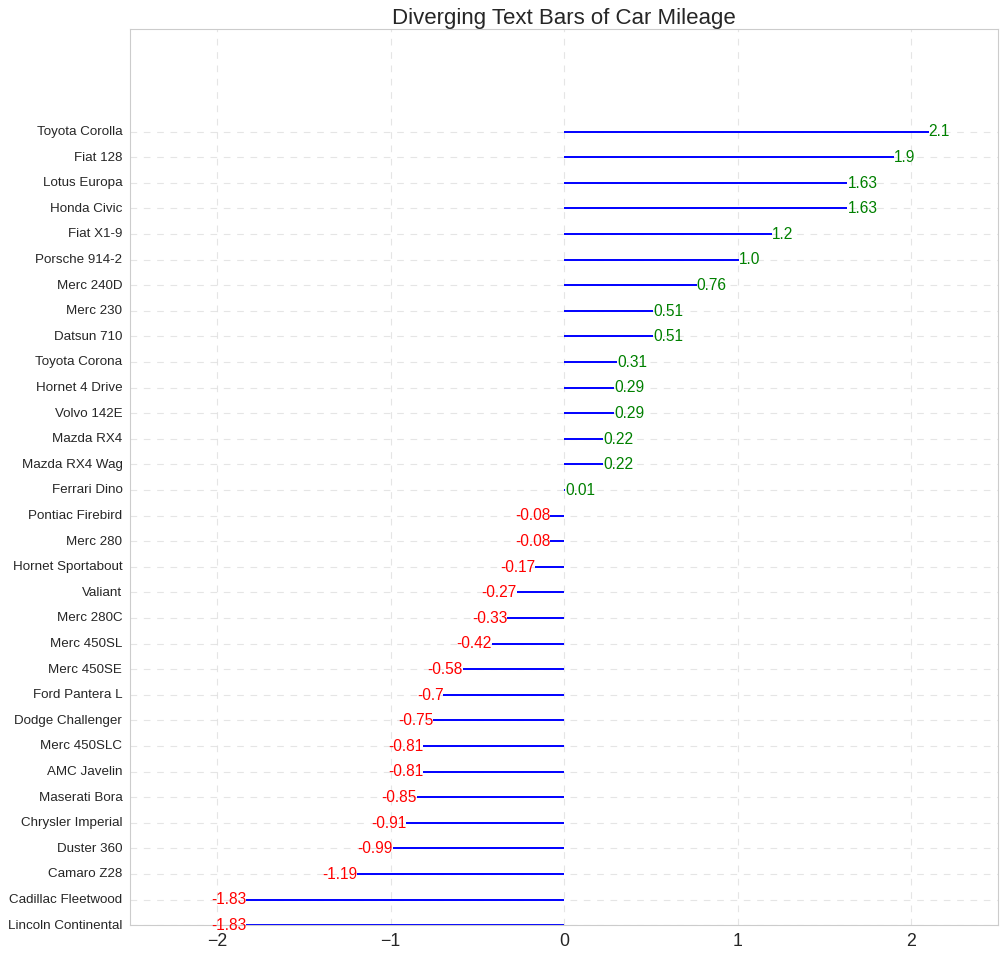

In [ ]:
# Prepare Data

df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")

x = df.loc[:, ['mpg']]

df['mpg_z'] = (x - x.mean())/x.std()

df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]

df.sort_values('mpg_z', inplace=True)

df.reset_index(inplace=True)



# Draw plot

plt.figure(figsize=(14,14), dpi= 80)

plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z)

for x, y, tex in zip(df.mpg_z, df.index, df.mpg_z):

    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 0 else 'left',

                 verticalalignment='center', fontdict={'color':'red' if x < 0 else 'green', 'size':14})



# Decorations

plt.yticks(df.index, df.cars, fontsize=12)

plt.title('Diverging Text Bars of Car Mileage', fontdict={'size':20})

plt.grid(linestyle='--', alpha=0.5)

plt.xlim(-2.5, 2.5)

plt.show()



### 2.2.3 Area Chart
By coloring the area between the axes and lines, area charts emphasize not only peaks and valleys, but also the duration of highs and lows. The longer the high lasts, the larger the area below the line.

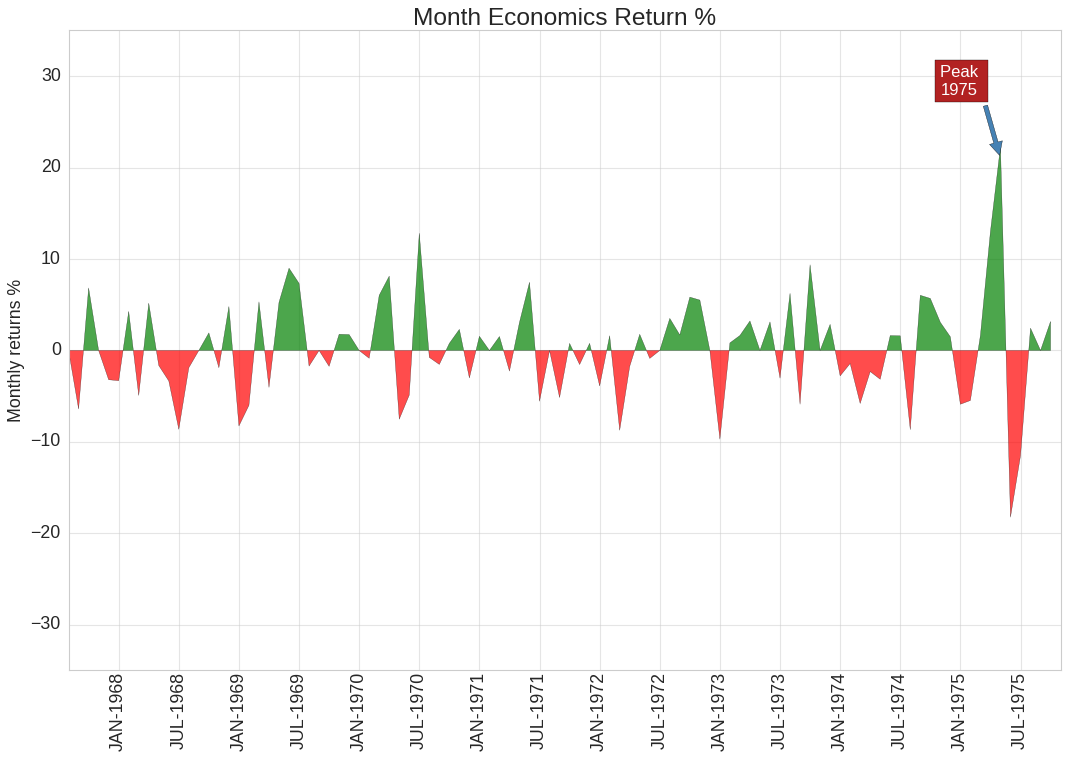

In [ ]:
import numpy as np

import pandas as pd



# Prepare Data

df = pd.read_csv("https://github.com/selva86/datasets/raw/master/economics.csv", parse_dates=['date']).head(100)

x = np.arange(df.shape[0])

y_returns = (df.psavert.diff().fillna(0)/df.psavert.shift(1)).fillna(0) * 100



# Plot

plt.figure(figsize=(16,10), dpi= 80)

plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] >= 0, facecolor='green', interpolate=True, alpha=0.7)

plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] <= 0, facecolor='red', interpolate=True, alpha=0.7)



# Annotate

plt.annotate('Peak \n1975', xy=(94.0, 21.0), xytext=(88.0, 28),

             bbox=dict(boxstyle='square', fc='firebrick'),

             arrowprops=dict(facecolor='steelblue', shrink=0.05), fontsize=15, color='white')





# Decorations

xtickvals = [str(m)[:3].upper()+"-"+str(y) for y,m in zip(df.date.dt.year, df.date.dt.month_name())]

plt.gca().set_xticks(x[::6])

plt.gca().set_xticklabels(xtickvals[::6], rotation=90, fontdict={'horizontalalignment': 'center', 'verticalalignment': 'center_baseline'})

plt.ylim(-35,35)

plt.xlim(1,100)

plt.title("Month Economics Return %", fontsize=22)

plt.ylabel('Monthly returns %')

plt.grid(alpha=0.5)

plt.show()



## 2.3 Ranking

### 2.3.1 Lollipop Chart
An Lollipop Chart effectively shows the rank order of items.

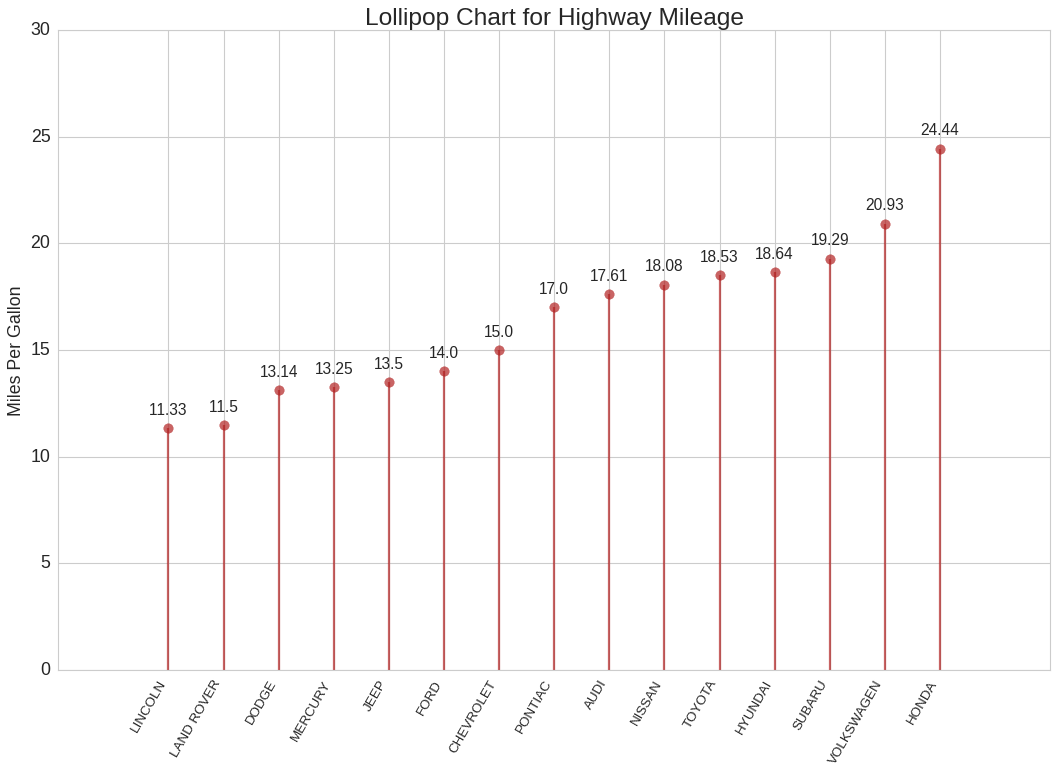

In [ ]:
# Prepare Data

df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())

df.sort_values('cty', inplace=True)

df.reset_index(inplace=True)



# Draw plot

fig, ax = plt.subplots(figsize=(16,10), dpi= 80)

ax.vlines(x=df.index, ymin=0, ymax=df.cty, color='firebrick', alpha=0.7, linewidth=2)

ax.scatter(x=df.index, y=df.cty, s=75, color='firebrick', alpha=0.7)



# Title, Label, Ticks and Ylim

ax.set_title('Lollipop Chart for Highway Mileage', fontdict={'size':22})

ax.set_ylabel('Miles Per Gallon')

ax.set_xticks(df.index)

ax.set_xticklabels(df.manufacturer.str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})

ax.set_ylim(0, 30)



# Annotate

for row in df.itertuples():

    ax.text(row.Index, row.cty+.5, s=round(row.cty, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)



plt.show()

### 2.3.2 Dot Plot
The dot plot chart conveys the rank order of items, and since it's aligned along the horizontal axis, you can more easily see how far the points are from each other.

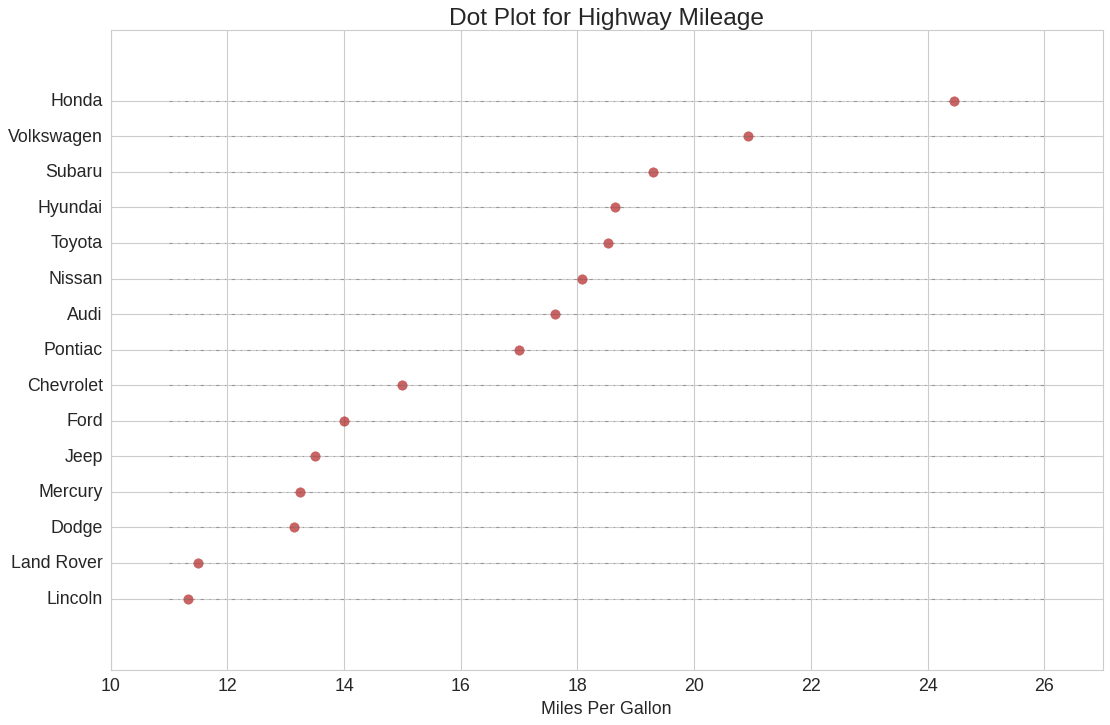

In [ ]:
# Prepare Data

df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())

df.sort_values('cty', inplace=True)

df.reset_index(inplace=True)



# Draw plot

fig, ax = plt.subplots(figsize=(16,10), dpi= 80)

ax.hlines(y=df.index, xmin=11, xmax=26, color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')

ax.scatter(y=df.index, x=df.cty, s=75, color='firebrick', alpha=0.7)



# Title, Label, Ticks and Ylim

ax.set_title('Dot Plot for Highway Mileage', fontdict={'size':22})

ax.set_xlabel('Miles Per Gallon')

ax.set_yticks(df.index)

ax.set_yticklabels(df.manufacturer.str.title(), fontdict={'horizontalalignment': 'right'})

ax.set_xlim(10, 27)

plt.show()



### 2.4 Distribution

### 2.4.1 Histogram for Continuous Variable
A histogram displays the frequency distribution of a given variable.

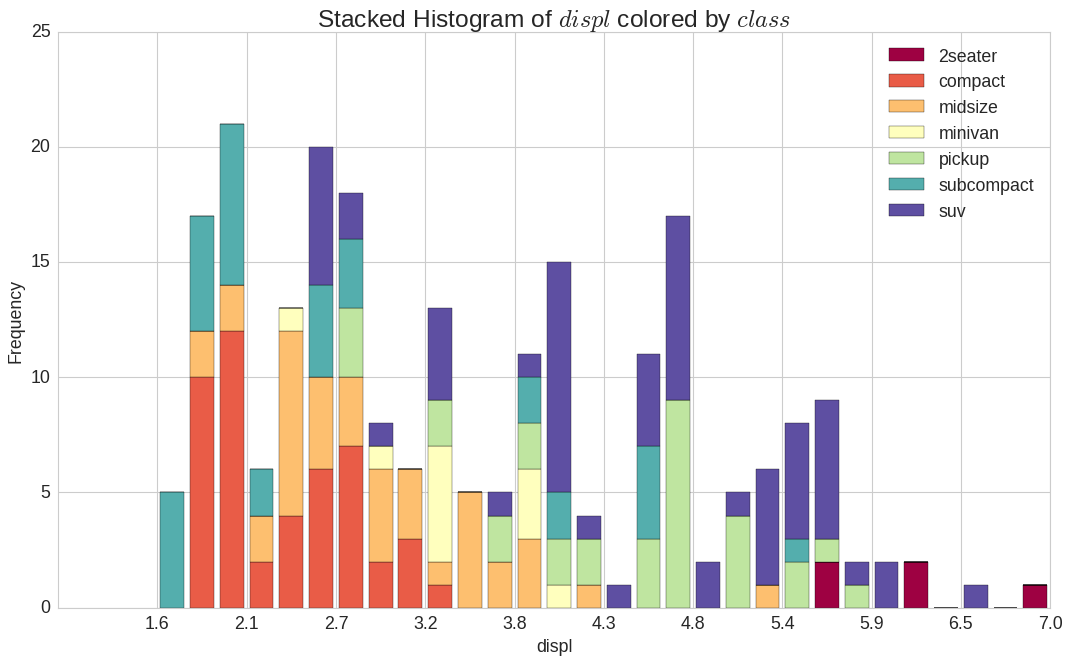

In [ ]:
# Import Data

df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")



# Prepare data

x_var = 'displ'

groupby_var = 'class'

df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)

vals = [df[x_var].values.tolist() for i, df in df_agg]



# Draw

plt.figure(figsize=(16,9), dpi= 80)

colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]

n, bins, patches = plt.hist(vals, 30, stacked=True, density=False, color=colors[:len(vals)])



# Decoration

plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})

plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)

plt.xlabel(x_var)

plt.ylabel("Frequency")

plt.ylim(0, 25)

plt.xticks(ticks=bins[::3], labels=[round(b,1) for b in bins[::3]])

plt.show()



### 2.4.2 Density Plot
Density plot is a common tool for visualizing the distribution of continuous variables. By grouping them by the Response variable, you can examine the relationship between X and Y. The following cases are used for presentation purposes to describe how the distribution of city miles varies with the number of cylinders.

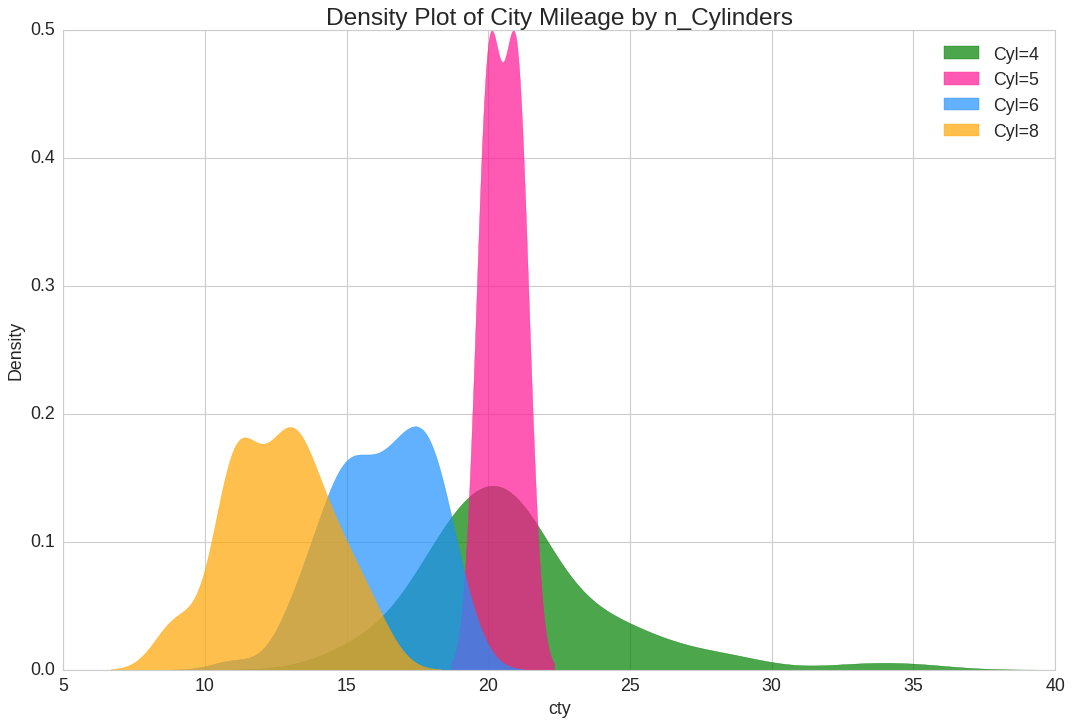

In [ ]:
# Import Data

df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")



# Draw Plot

plt.figure(figsize=(16,10), dpi= 80)

sns.kdeplot(df.loc[df['cyl'] == 4, "cty"], fill=True, color="g", label="Cyl=4", alpha=.7)

sns.kdeplot(df.loc[df['cyl'] == 5, "cty"], fill=True, color="deeppink", label="Cyl=5", alpha=.7)

sns.kdeplot(df.loc[df['cyl'] == 6, "cty"], fill=True, color="dodgerblue", label="Cyl=6", alpha=.7)

sns.kdeplot(df.loc[df['cyl'] == 8, "cty"], fill=True, color="orange", label="Cyl=8", alpha=.7)



# Decoration

plt.title('Density Plot of City Mileage by n_Cylinders', fontsize=22)

plt.legend()

plt.show()



### 2.4.3 Density Curves with Histogram
Density curves with histograms bring together the collective information conveyed by two plots, so you can put them in one plot instead of two.

/tmp/ipython-input-1783820157.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df['class'] == 'compact', "cty"], color="dodgerblue", label="Compact", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
/tmp/ipython-input-1783820157.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.l

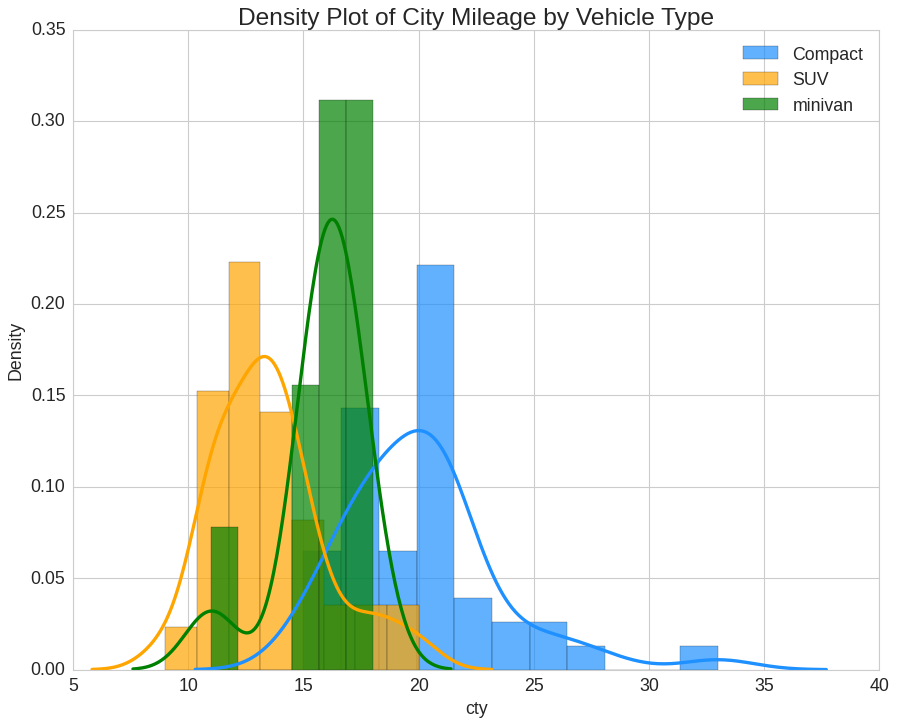

In [ ]:
# Import Data

df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")



# Draw Plot

plt.figure(figsize=(13,10), dpi= 80)

sns.distplot(df.loc[df['class'] == 'compact', "cty"], color="dodgerblue", label="Compact", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})

sns.distplot(df.loc[df['class'] == 'suv', "cty"], color="orange", label="SUV", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})

sns.distplot(df.loc[df['class'] == 'minivan', "cty"], color="g", label="minivan", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})

plt.ylim(0, 0.35)



# Decoration

plt.title('Density Plot of City Mileage by Vehicle Type', fontsize=22)

plt.legend()

plt.show()



### 2.4.4 Box Plot

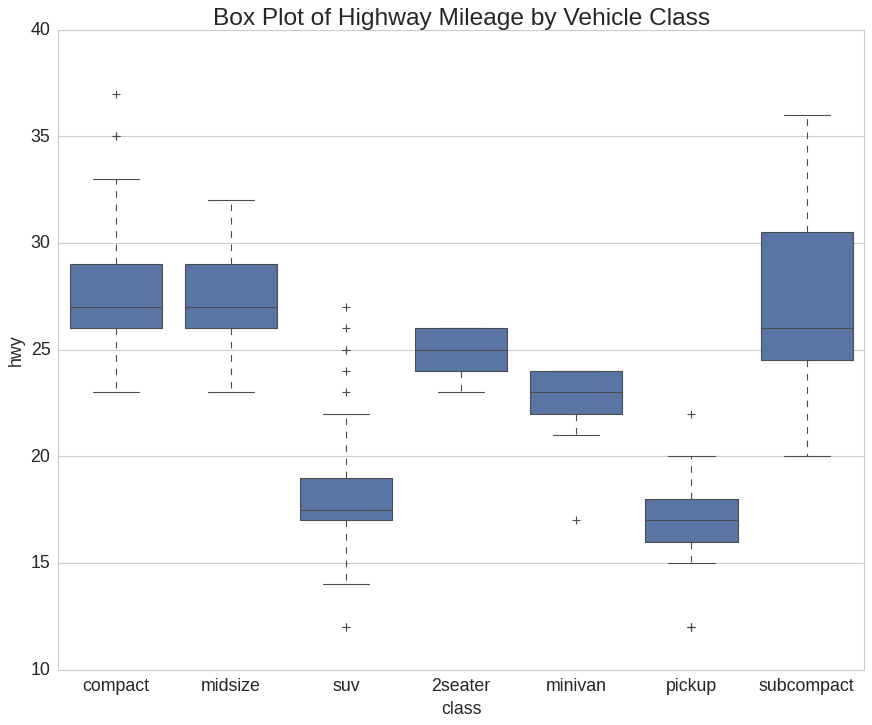

In [ ]:
# Import Data

df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")



# Draw Plot

plt.figure(figsize=(13,10), dpi= 80)

sns.boxplot(x='class', y='hwy', data=df, notch=False)



# Decoration

plt.title('Box Plot of Highway Mileage by Vehicle Class', fontsize=22)

plt.ylim(10, 40)

plt.show()

## 2.5 Composition

### 2.5.1 Pie Chart
Pie charts are a classic way of showing composition. However, it is generally not recommended these days as the area of the pie portion can sometimes become misleading. Therefore, if you are going to use a pie chart, it is highly recommended to explicitly write down the percentages or numbers for each part of the pie chart.

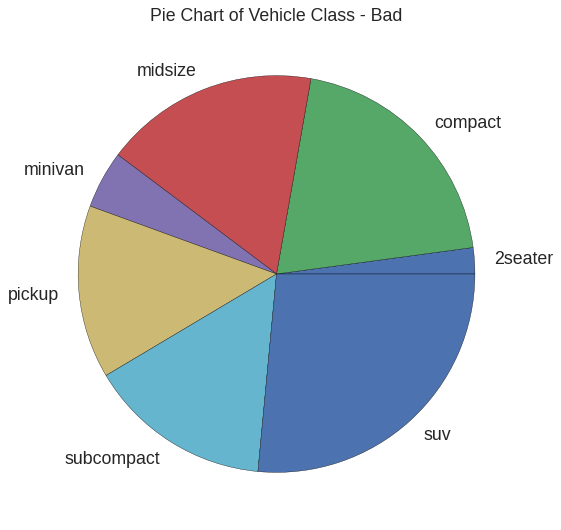

In [ ]:
# Import

df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")



# Prepare Data

df = df_raw.groupby('class').size()



# Make the plot with pandas

df.plot(kind='pie', subplots=True, figsize=(8, 8))

plt.title("Pie Chart of Vehicle Class - Bad")

plt.ylabel("")

plt.show()



### 2.5.2 Bar Chart

/tmp/ipython-input-2474718736.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(df['manufacturer'], rotation=60, horizontalalignment= 'right')


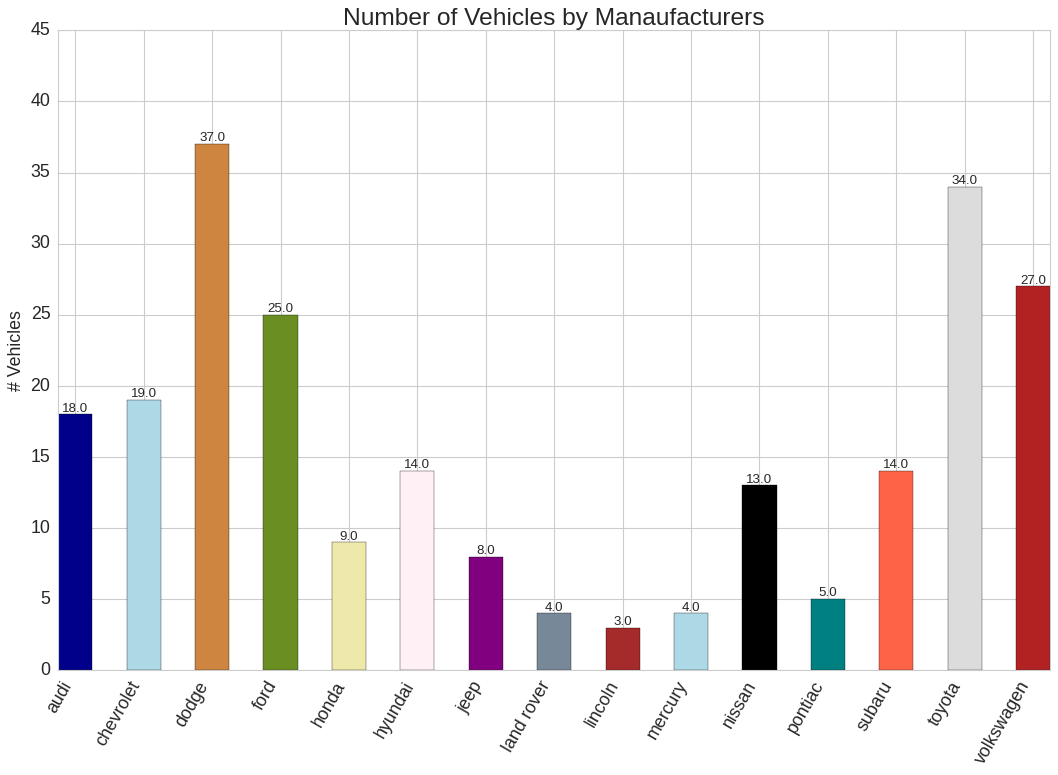

In [ ]:
import random



# Import Data

df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")



# Prepare Data

df = df_raw.groupby('manufacturer').size().reset_index(name='counts')

n = df['manufacturer'].unique().__len__()+1

all_colors = list(plt.cm.colors.cnames.keys())

random.seed(100)

c = random.choices(all_colors, k=n)



# Plot Bars

plt.figure(figsize=(16,10), dpi= 80)

plt.bar(df['manufacturer'], df['counts'], color=c, width=.5)

for i, val in enumerate(df['counts'].values):

    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})



# Decoration

plt.gca().set_xticklabels(df['manufacturer'], rotation=60, horizontalalignment= 'right')

plt.title("Number of Vehicles by Manaufacturers", fontsize=22)

plt.ylabel('# Vehicles')

plt.ylim(0, 45)

plt.show()

# 3. Practice

## 3.1 Jittering with stripplot
Often, multiple data points have the exact same X and Y values. As a result, multiple point draws overlap and hide. To avoid this, jitter the data points slightly so you can see them visually. It is convenient to use seaborn's stripplot() to implement this function. For this practice, you should figure out the relationship between the attributes cty and hwy.

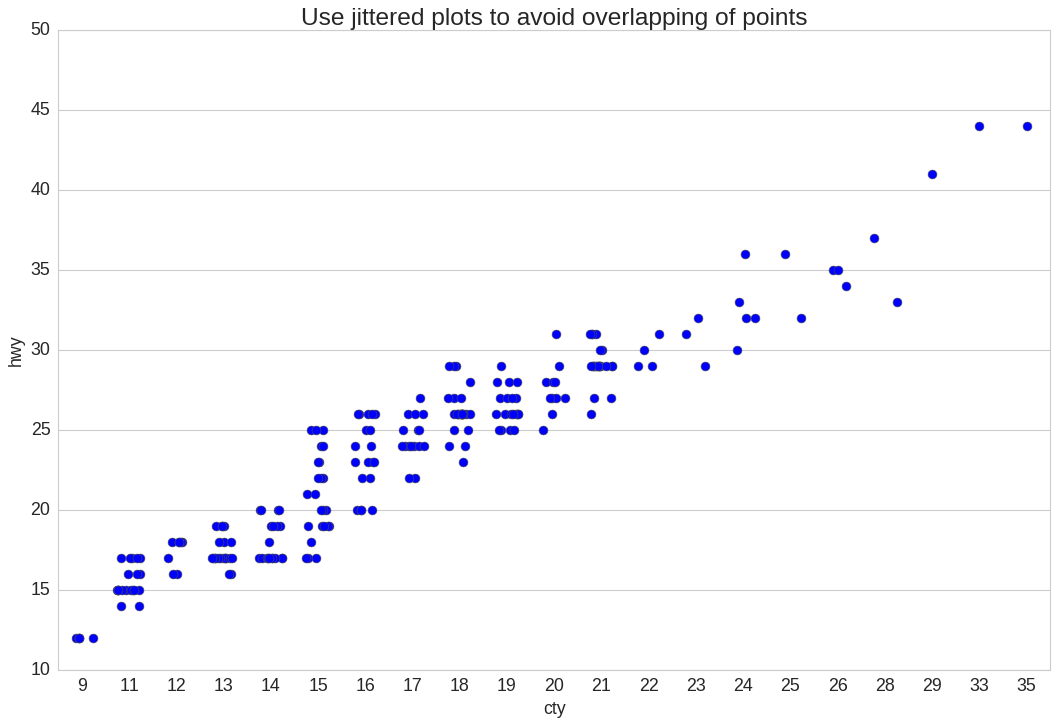

In [ ]:
# Import Data

df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")



# Draw Stripplot
# Insert your code







## 3.2 Dot + Box Plot
Dot + Box Plot conveys information similar to grouped box plots. Also, the points give an idea of how many data points are in each group. For this practice, you should draw the box plot of the hwy for different class based on the number of cylinders (cyl), you should also draw the points of hwy vesus class.

In [1]:
# Import Data

df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")



# Draw Plot
# Insert your code






NameError: name 'pd' is not defined